In [1]:
from abc import ABC
from sklearn.ensemble import RandomForestClassifier
from utils import *
import matplotlib.pyplot as plt
import cv2

In [2]:
# All custom model must have methods:
#     - fit(...)
#     - predict(...)
# You can add custom features like what I do below by making new class which inherited some class.
# If your model doesn't have the required methods, create custom ones for it.
class MyRandomForestClf(RandomForestClassifier):
    # def __init__(self, n_estimators_added_before_each_fit, **kwargs):
    def __init__(self,  **kwargs):
        # self.n_estimators_added_before_each_fit = n_estimators_added_before_each_fit
        super(MyRandomForestClf, self).__init__(**kwargs)
        self.all_x_get_from_fit = None
        self.all_y_get_from_fit = None

    def fit(self, x, y, **kwargs):
        # self.n_estimators += self.n_estimators_added_before_each_fit
        if self.all_x_get_from_fit is None:
            self.all_x_get_from_fit = x
        else:
            self.all_x_get_from_fit = np.concatenate((self.all_x_get_from_fit, x), axis=0)
        if self.all_y_get_from_fit is None:
            self.all_y_get_from_fit = y
        else:
            self.all_y_get_from_fit = np.concatenate((self.all_y_get_from_fit, y), axis=0)
        super(MyRandomForestClf, self).fit(self.all_x_get_from_fit, self.all_y_get_from_fit, **kwargs)

Visualize data

Valid range: 0~10
Attribute hp: min=0, max=10 => VALID
Attribute pa: min=0, max=10 => VALID
Attribute ma: min=0, max=10 => VALID
Attribute sp: min=0, max=10 => VALID
Attribute cr: min=0, max=10 => VALID


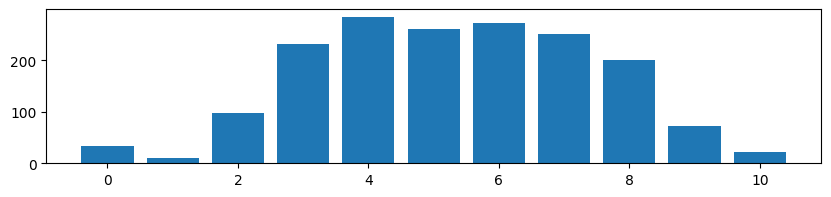

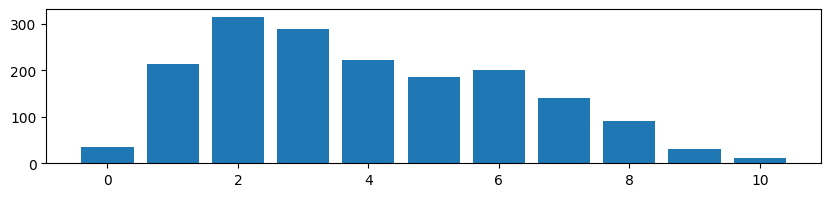

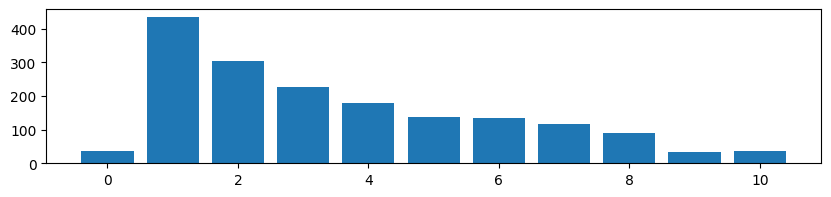

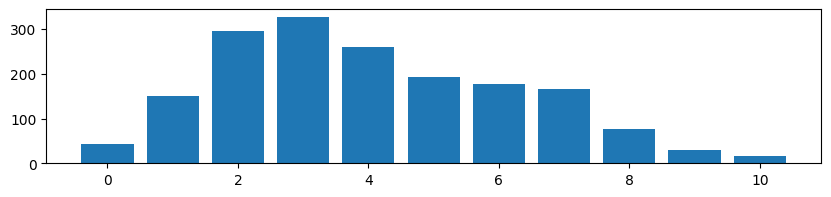

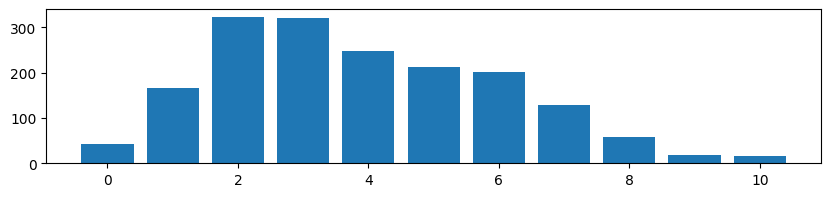

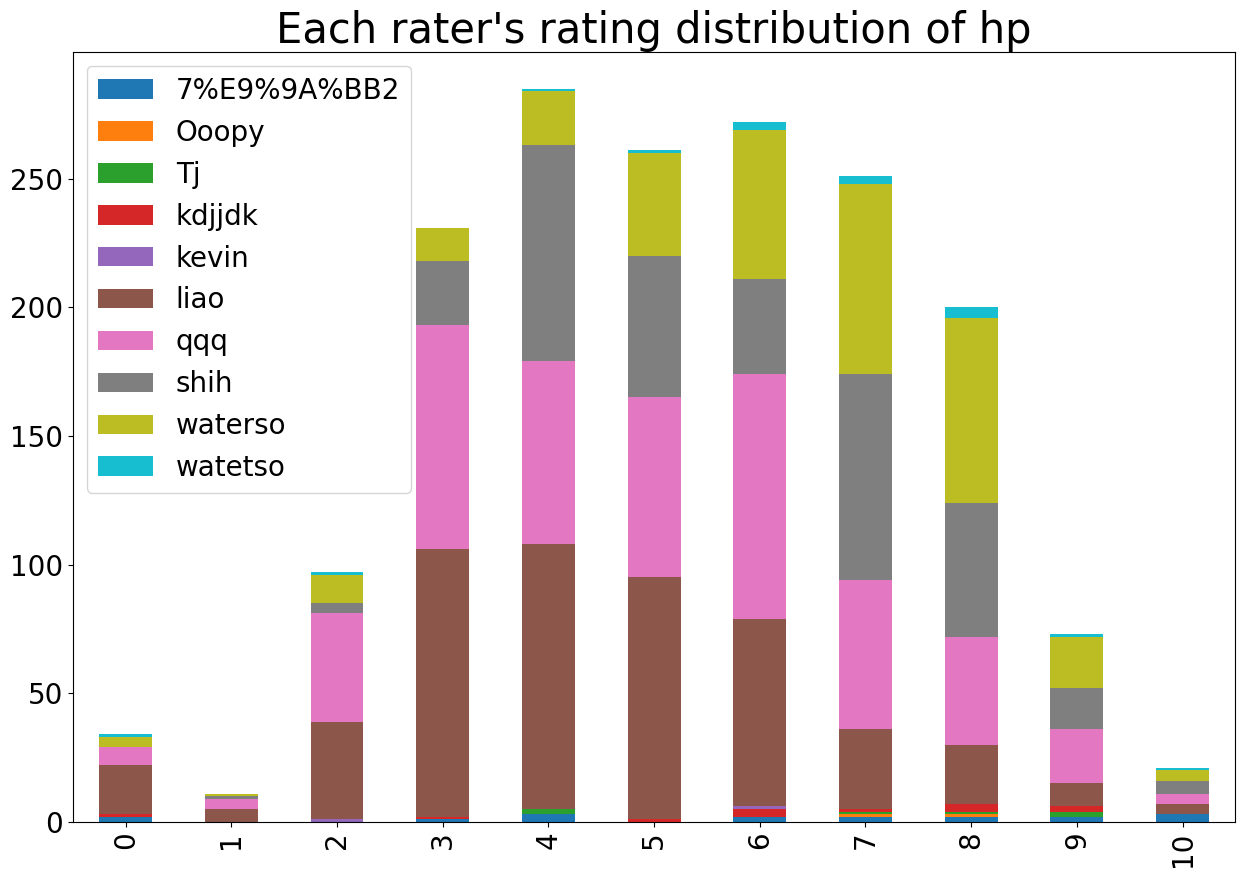

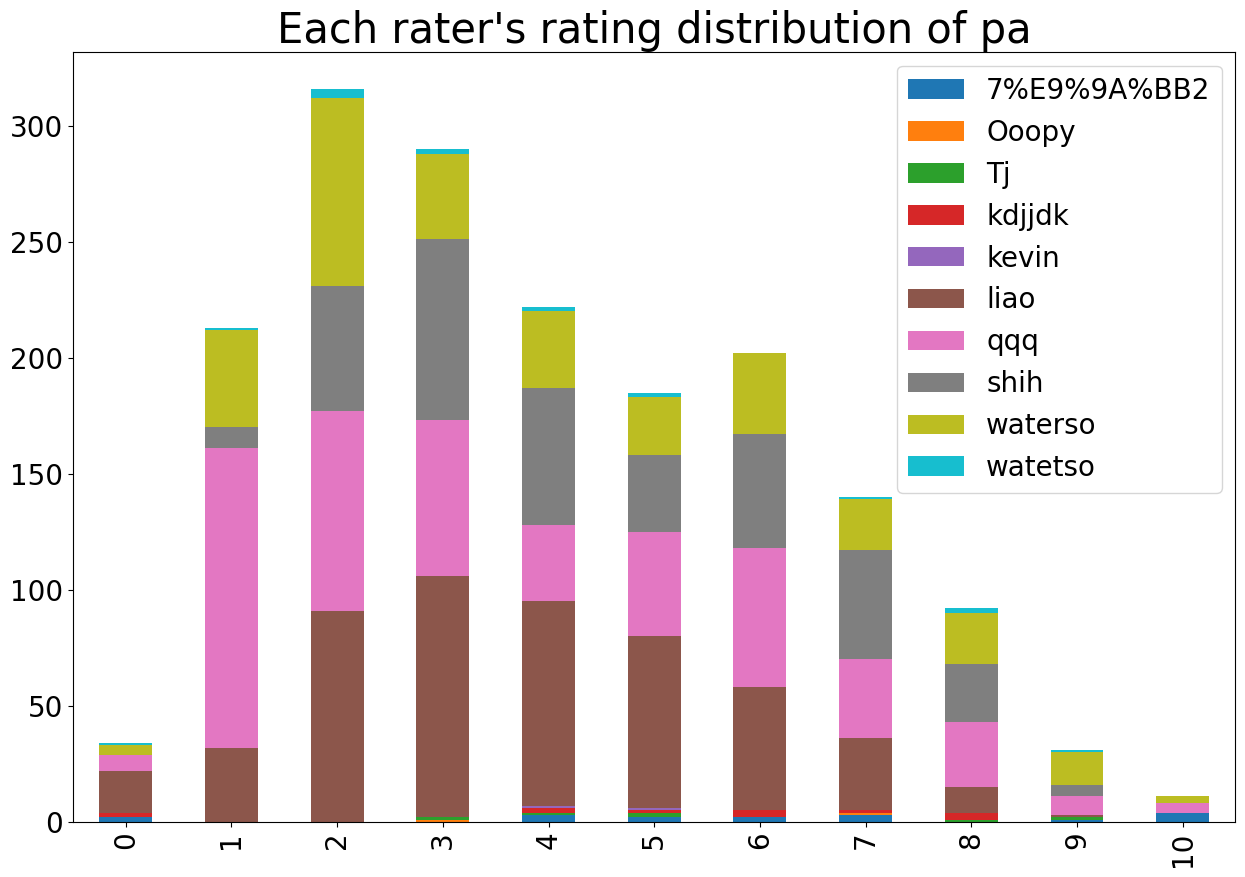

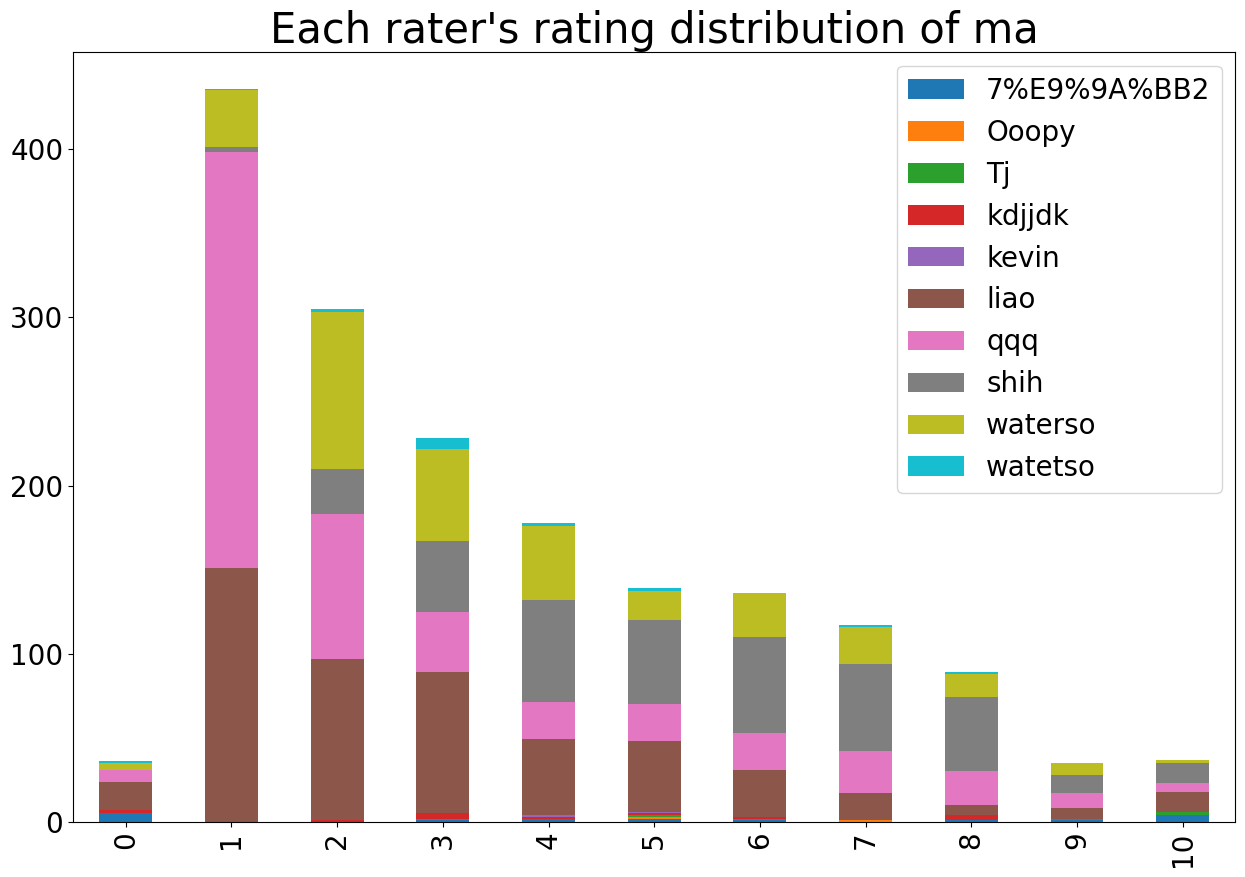

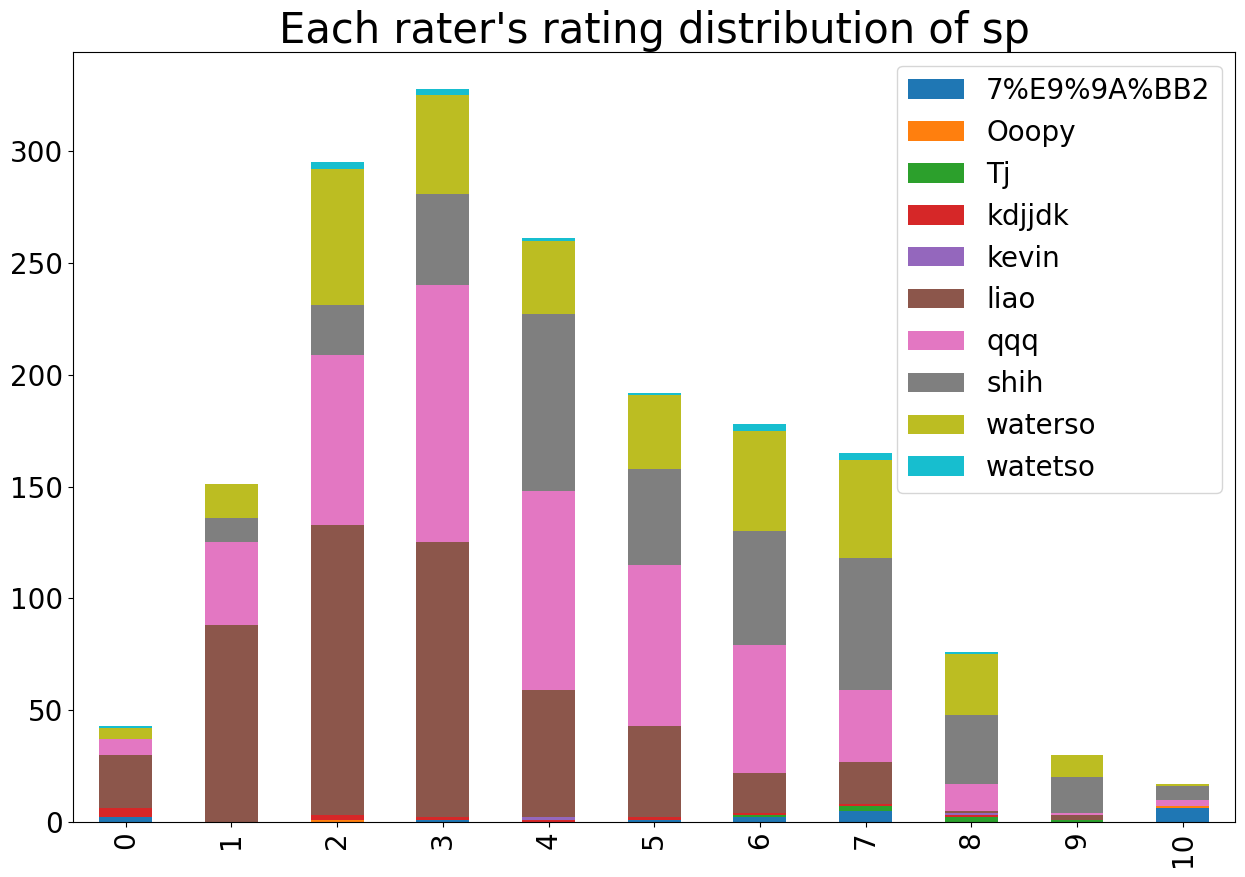

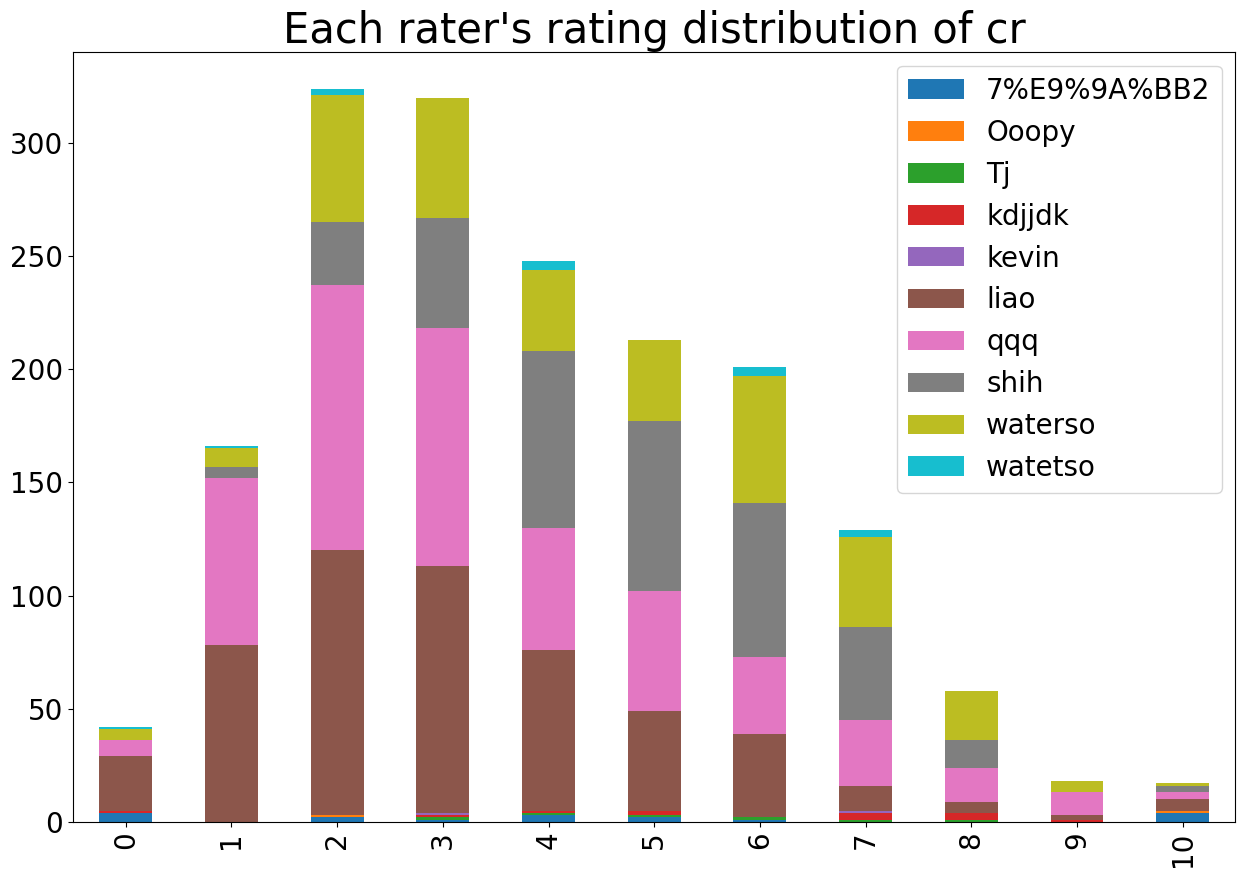

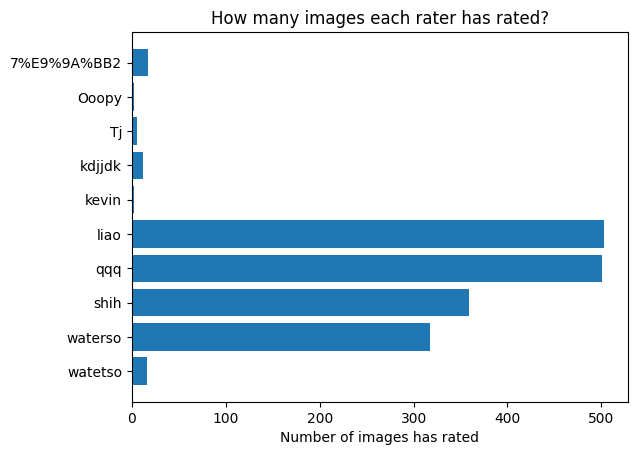

In [10]:
plt.rcdefaults()
record = RatingRecord(record_filename='data/all_records.csv', img_dir='data/images')
record.plot_rating_distribution_of_all_attrs()
record.plot_each_rater_rating_distribution_of_each_attribute(save_dir='statistics')
record.plot_how_many_images_each_rater_has_rated()

Train and save models

Epochs: 1
Batch size: 600
Input size(w,h): (40, 48)

===== Attribute hp =====

Epochs: 1
Batch size: 600
Input size(w,h): (40,48)

Holdout (test_size=0.2)
Epoch 1 iteration [3/3] elapsed_time: 00:00:12.12 val_acc: 0.150

===== Attribute pa =====

Epochs: 1
Batch size: 600
Input size(w,h): (40,48)

Holdout (test_size=0.2)
Epoch 1 iteration [3/3] elapsed_time: 00:00:11.64 val_acc: 0.194

===== Attribute ma =====

Epochs: 1
Batch size: 600
Input size(w,h): (40,48)

Holdout (test_size=0.2)
Epoch 1 iteration [3/3] elapsed_time: 00:00:13.48 val_acc: 0.218

===== Attribute sp =====

Epochs: 1
Batch size: 600
Input size(w,h): (40,48)

Holdout (test_size=0.2)
Epoch 1 iteration [3/3] elapsed_time: 00:00:17.76 val_acc: 0.209

===== Attribute cr =====

Epochs: 1
Batch size: 600
Input size(w,h): (40,48)

Holdout (test_size=0.2)
Epoch 1 iteration [3/3] elapsed_time: 00:00:13.96 val_acc: 0.201



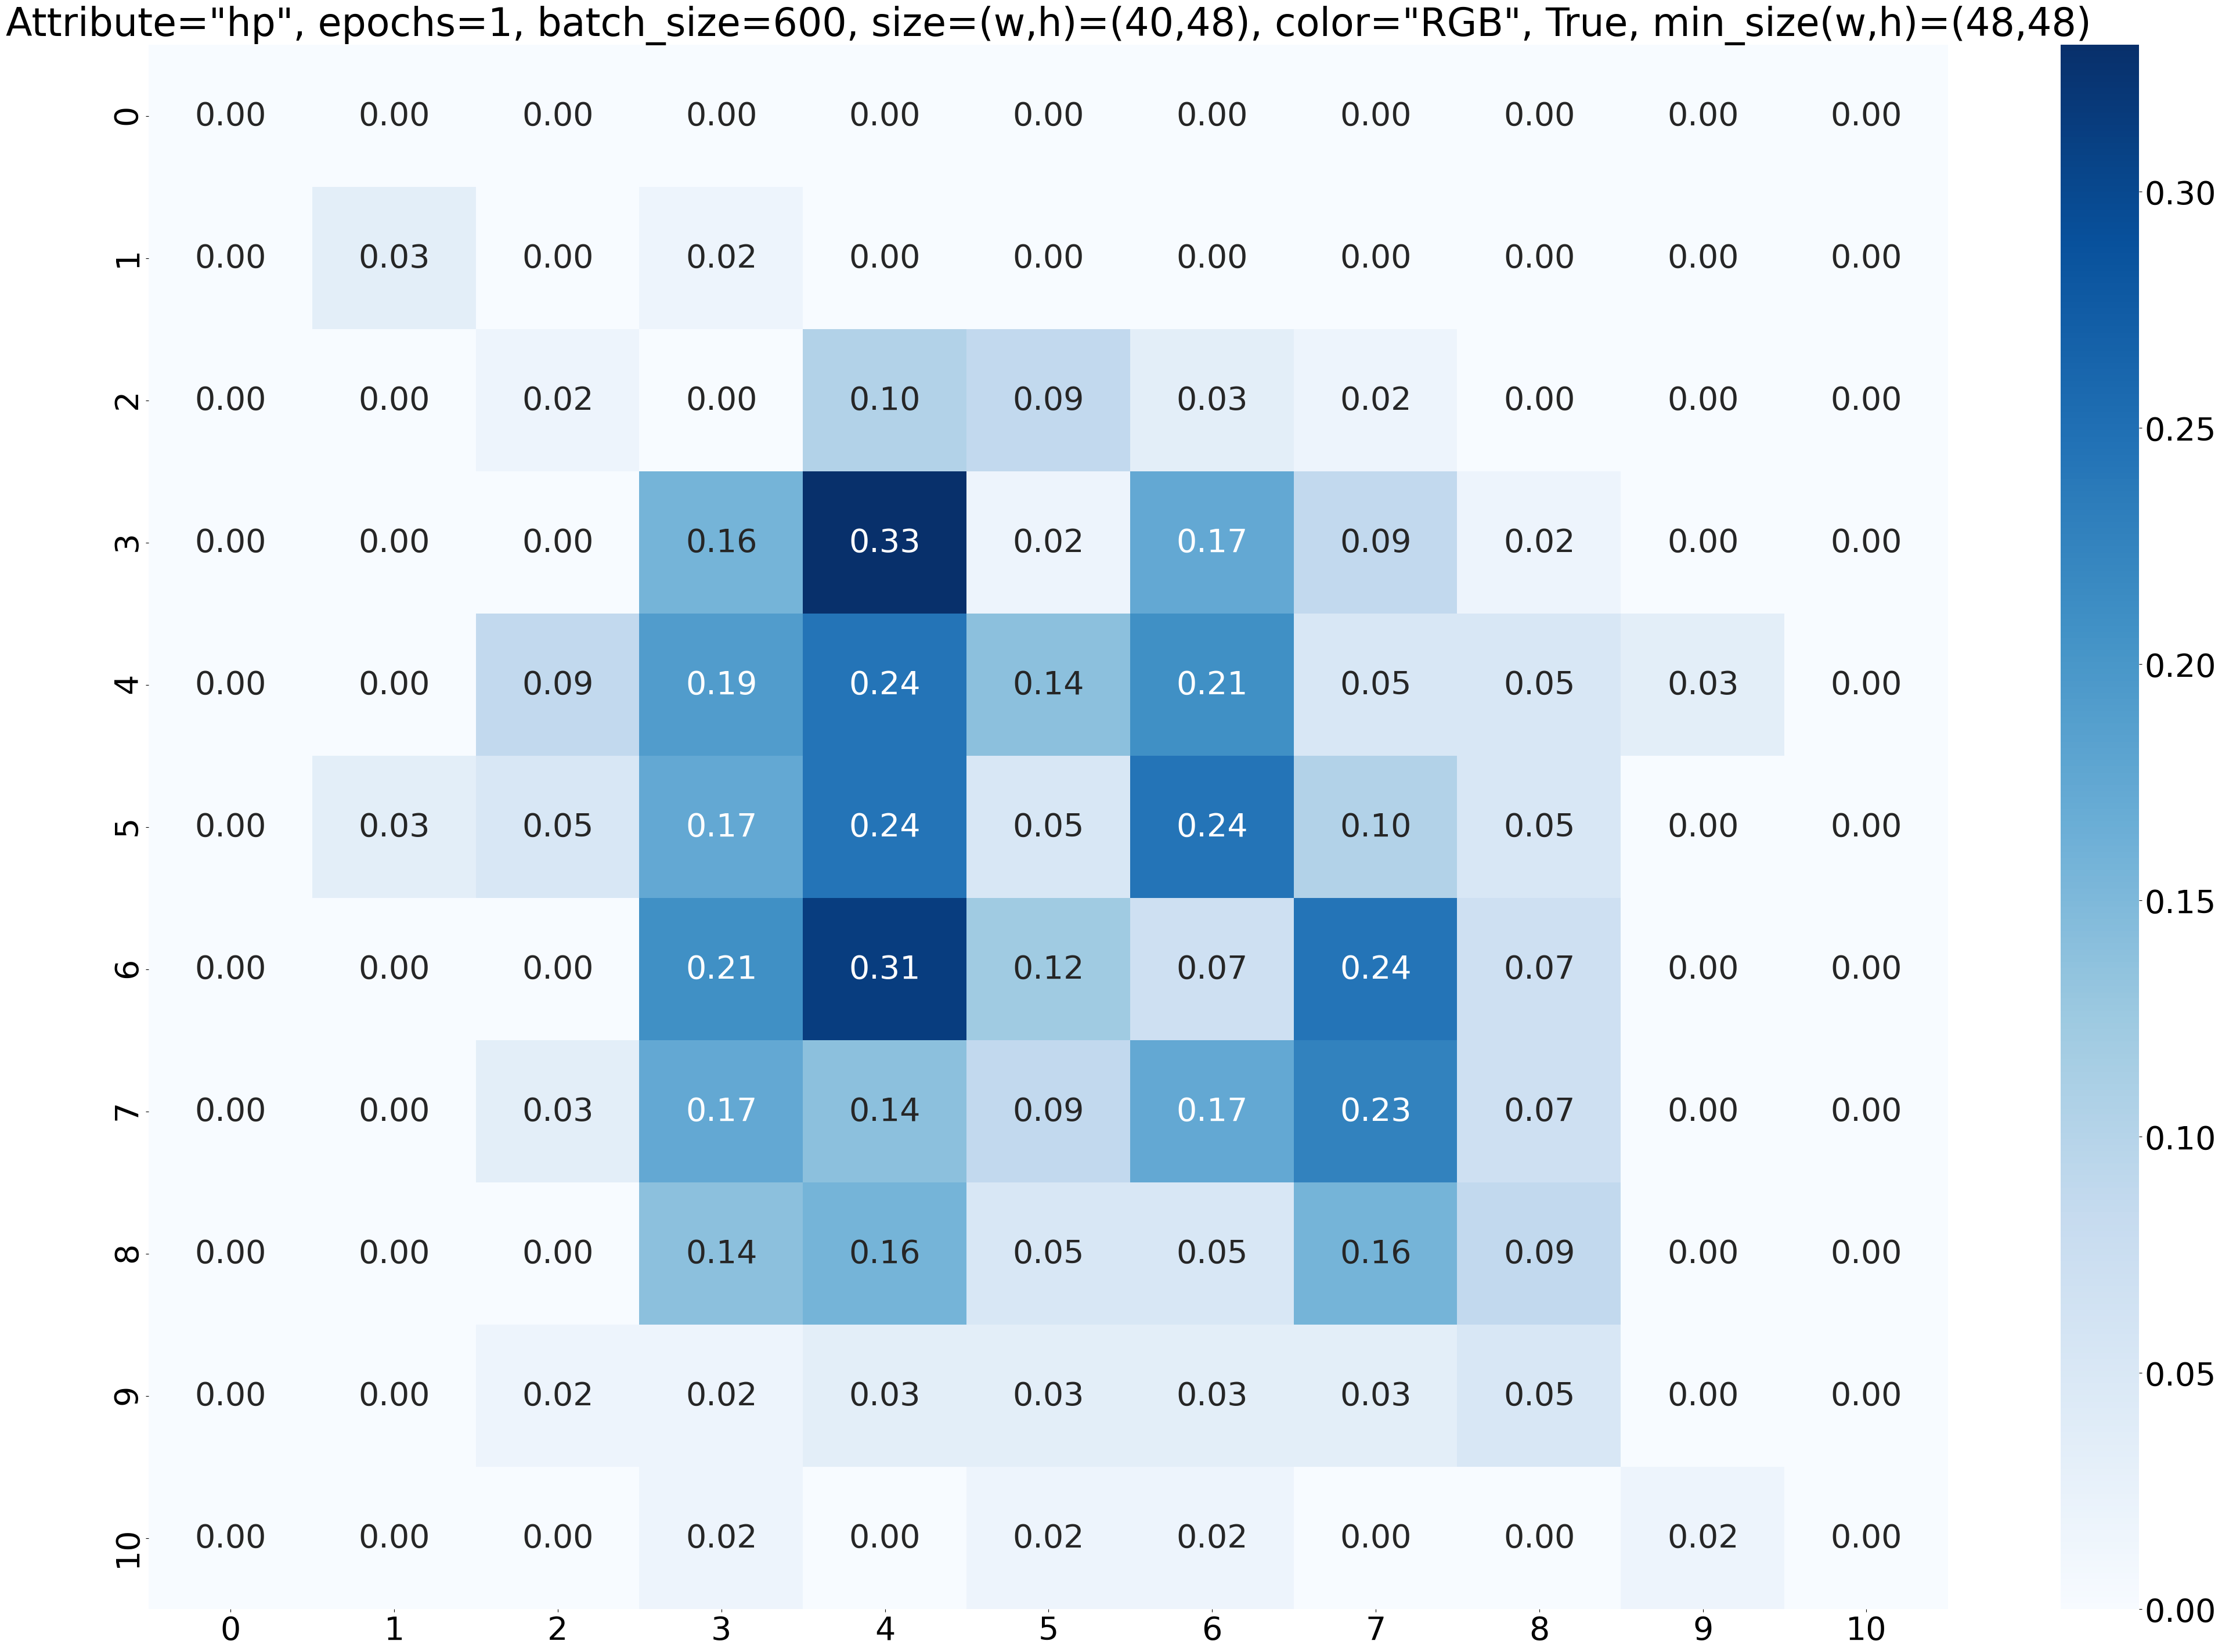

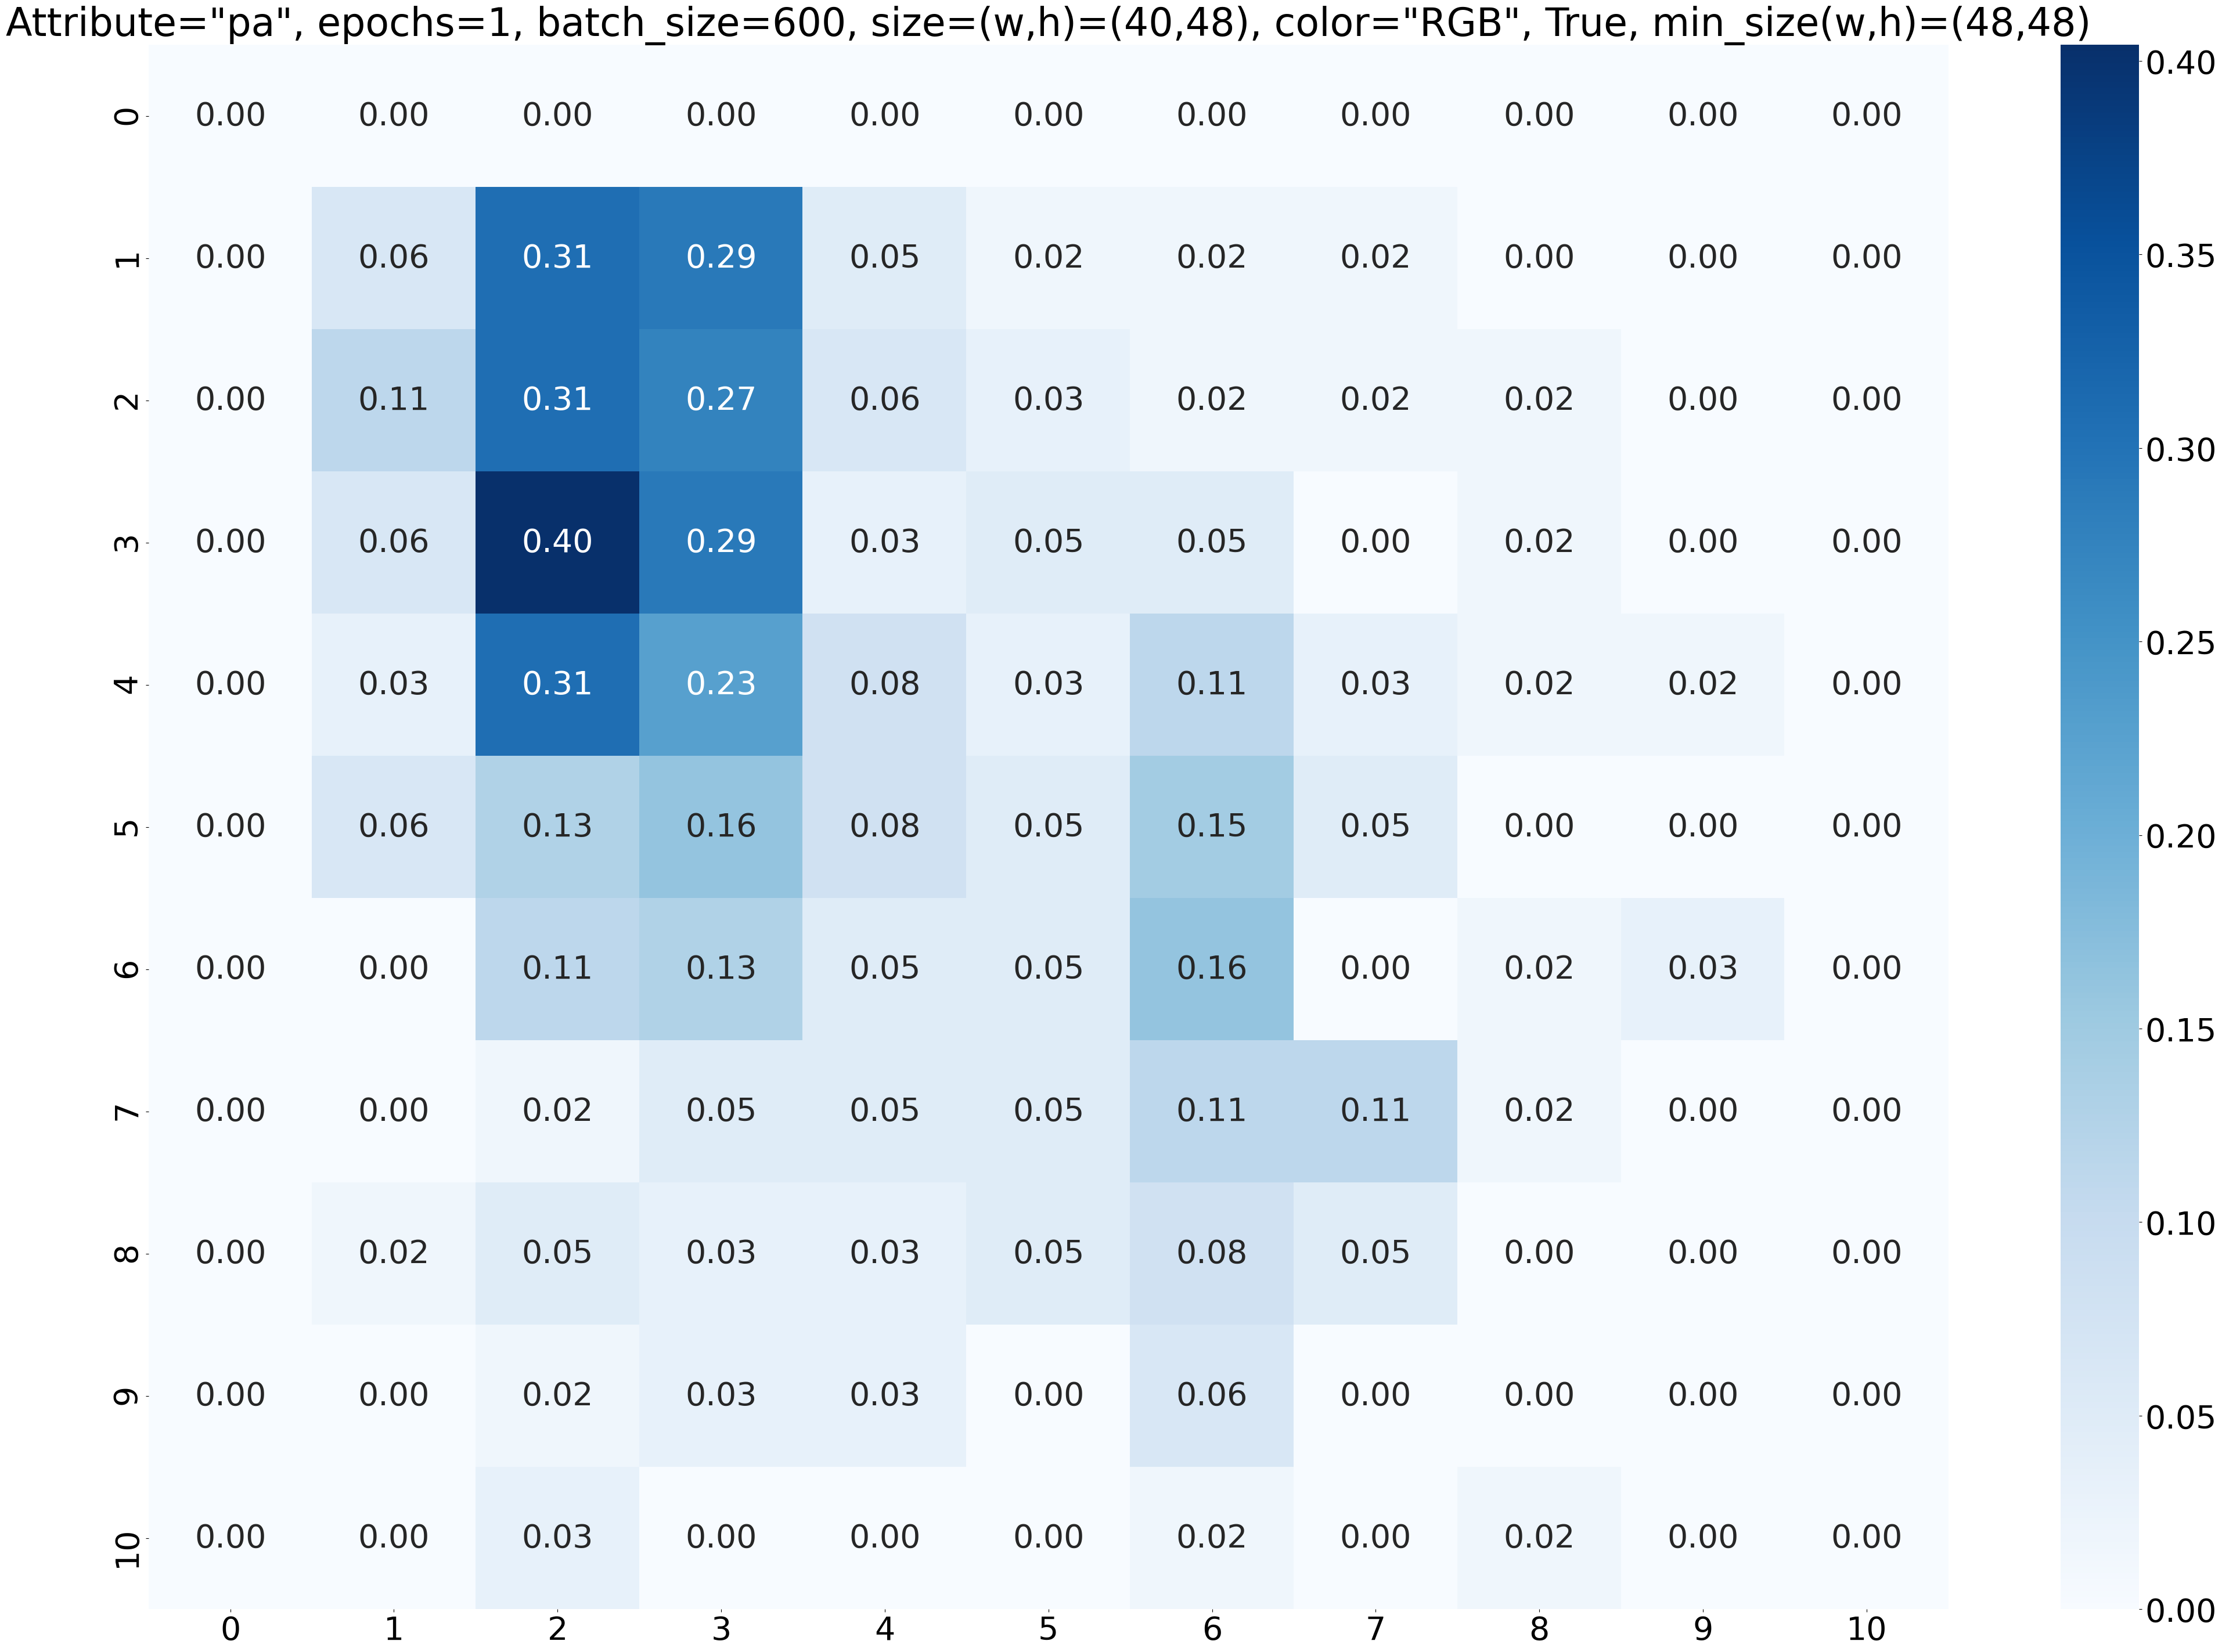

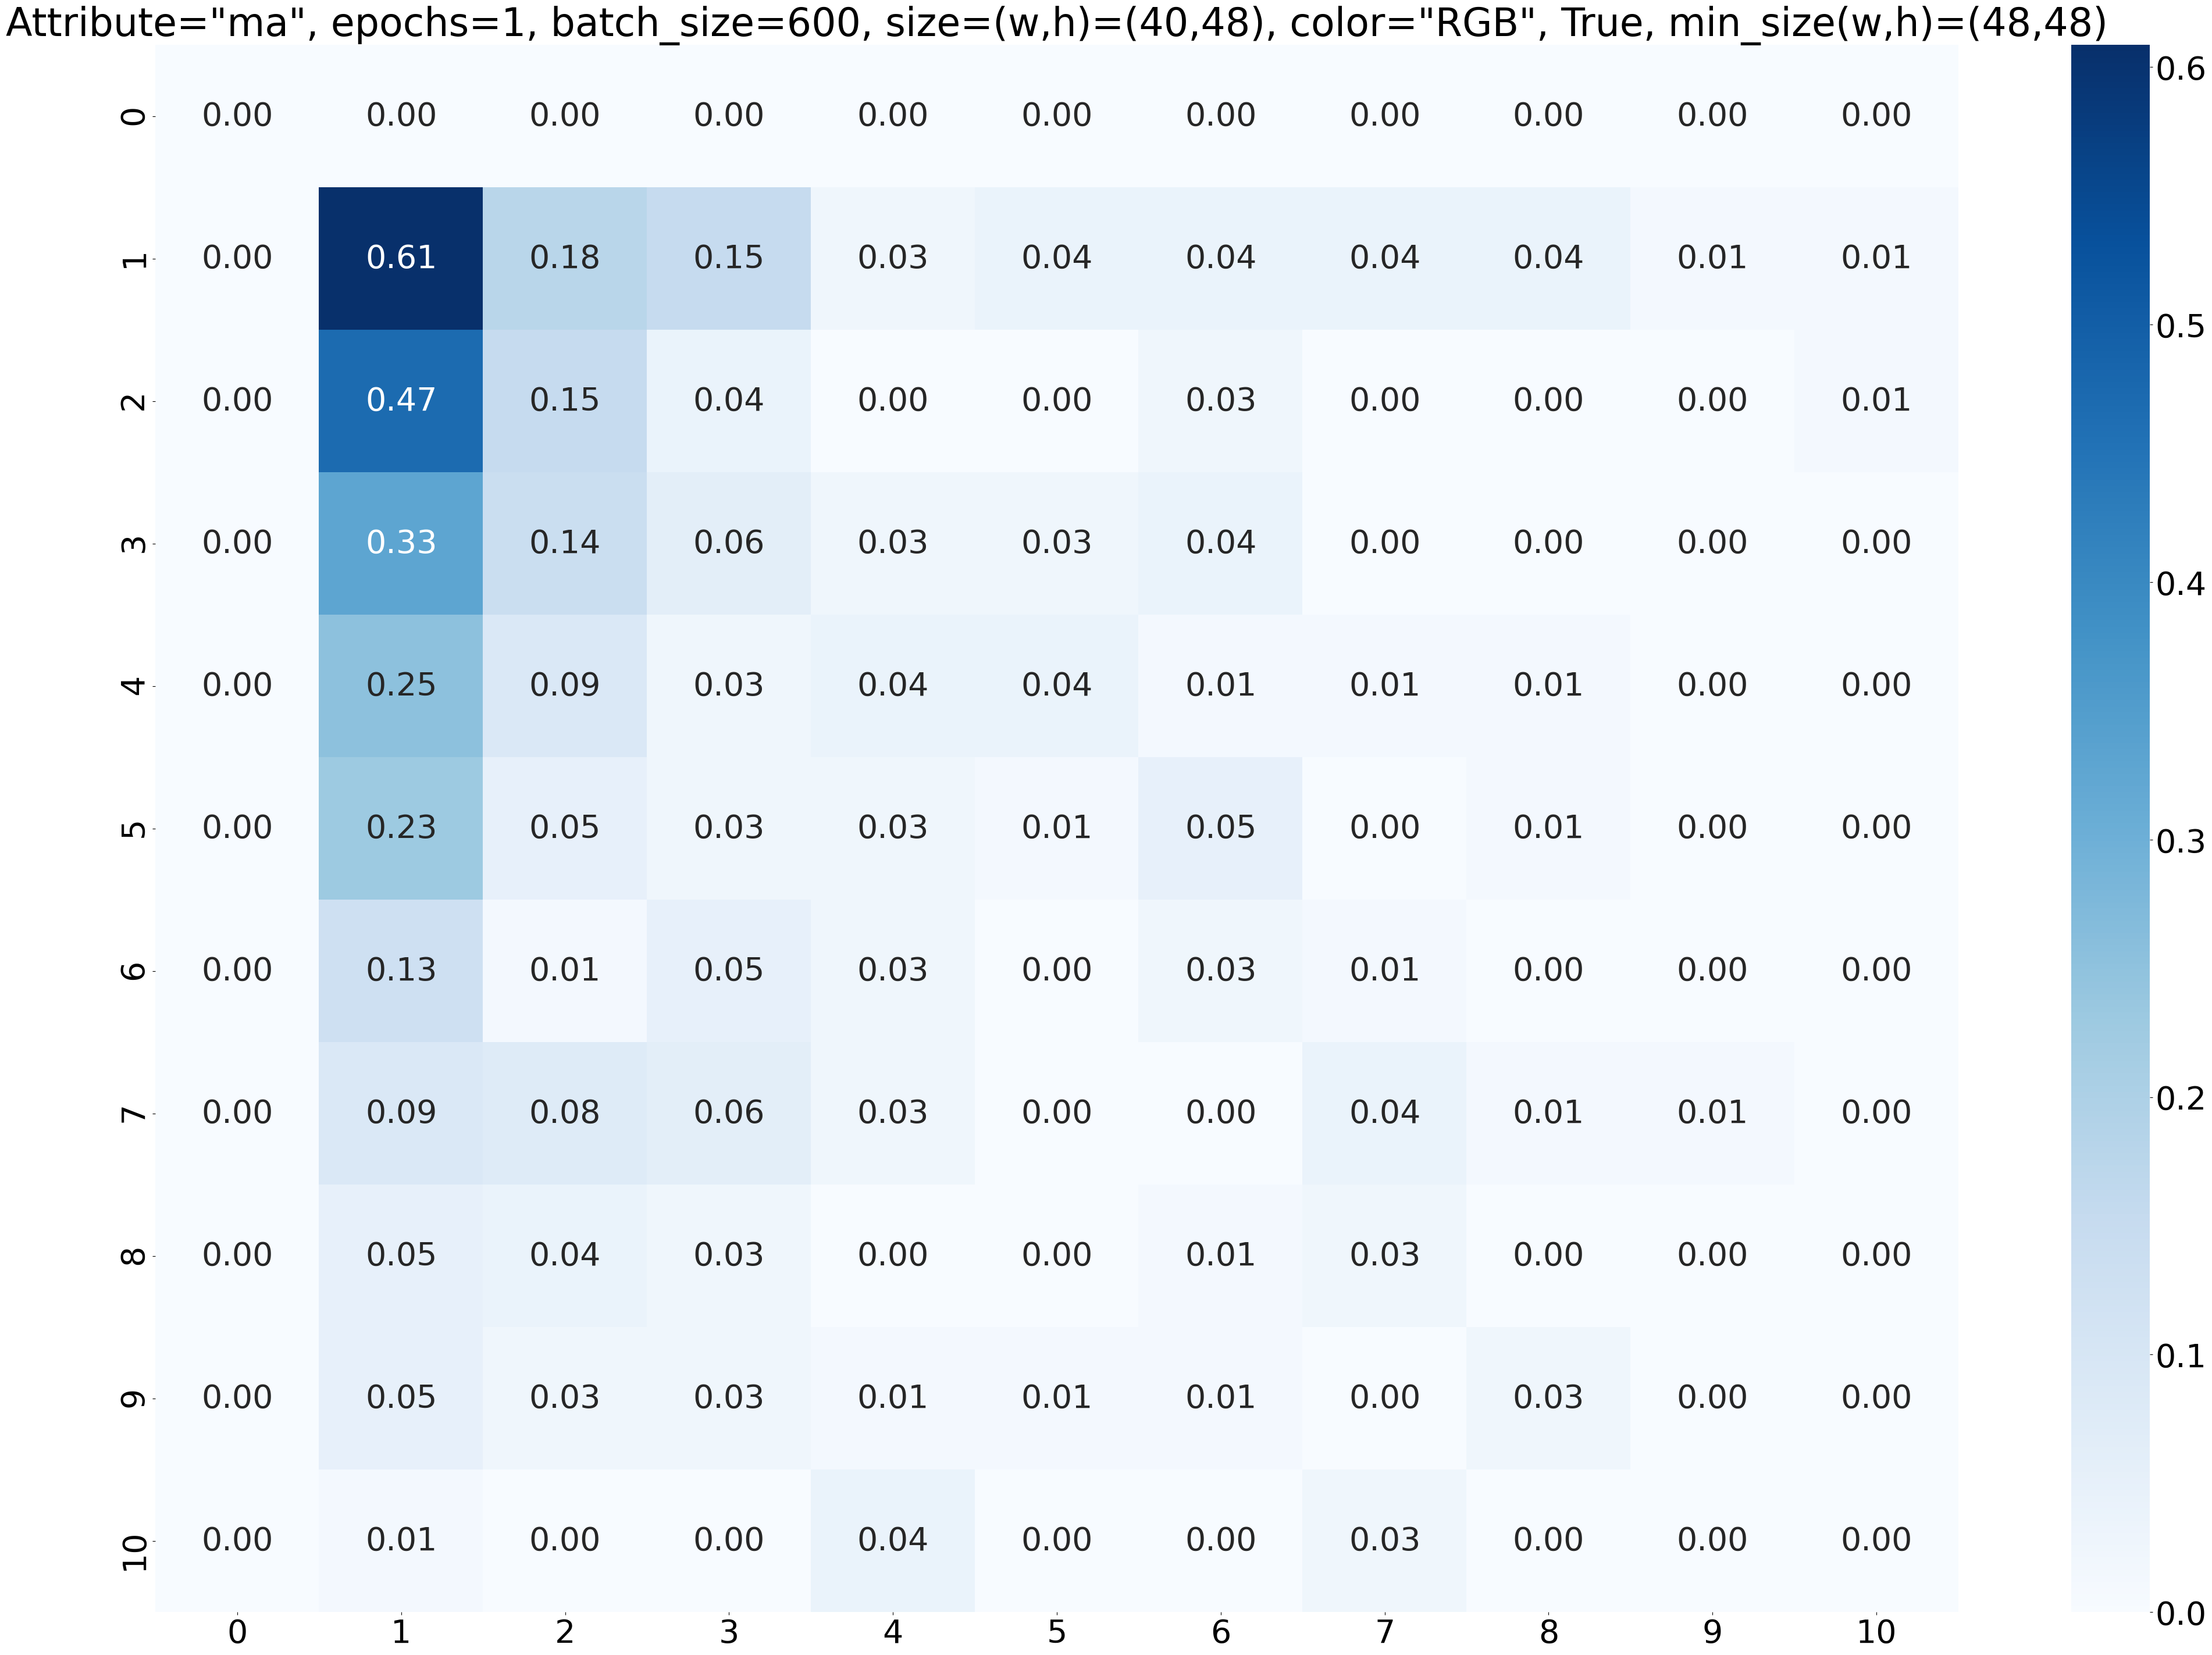

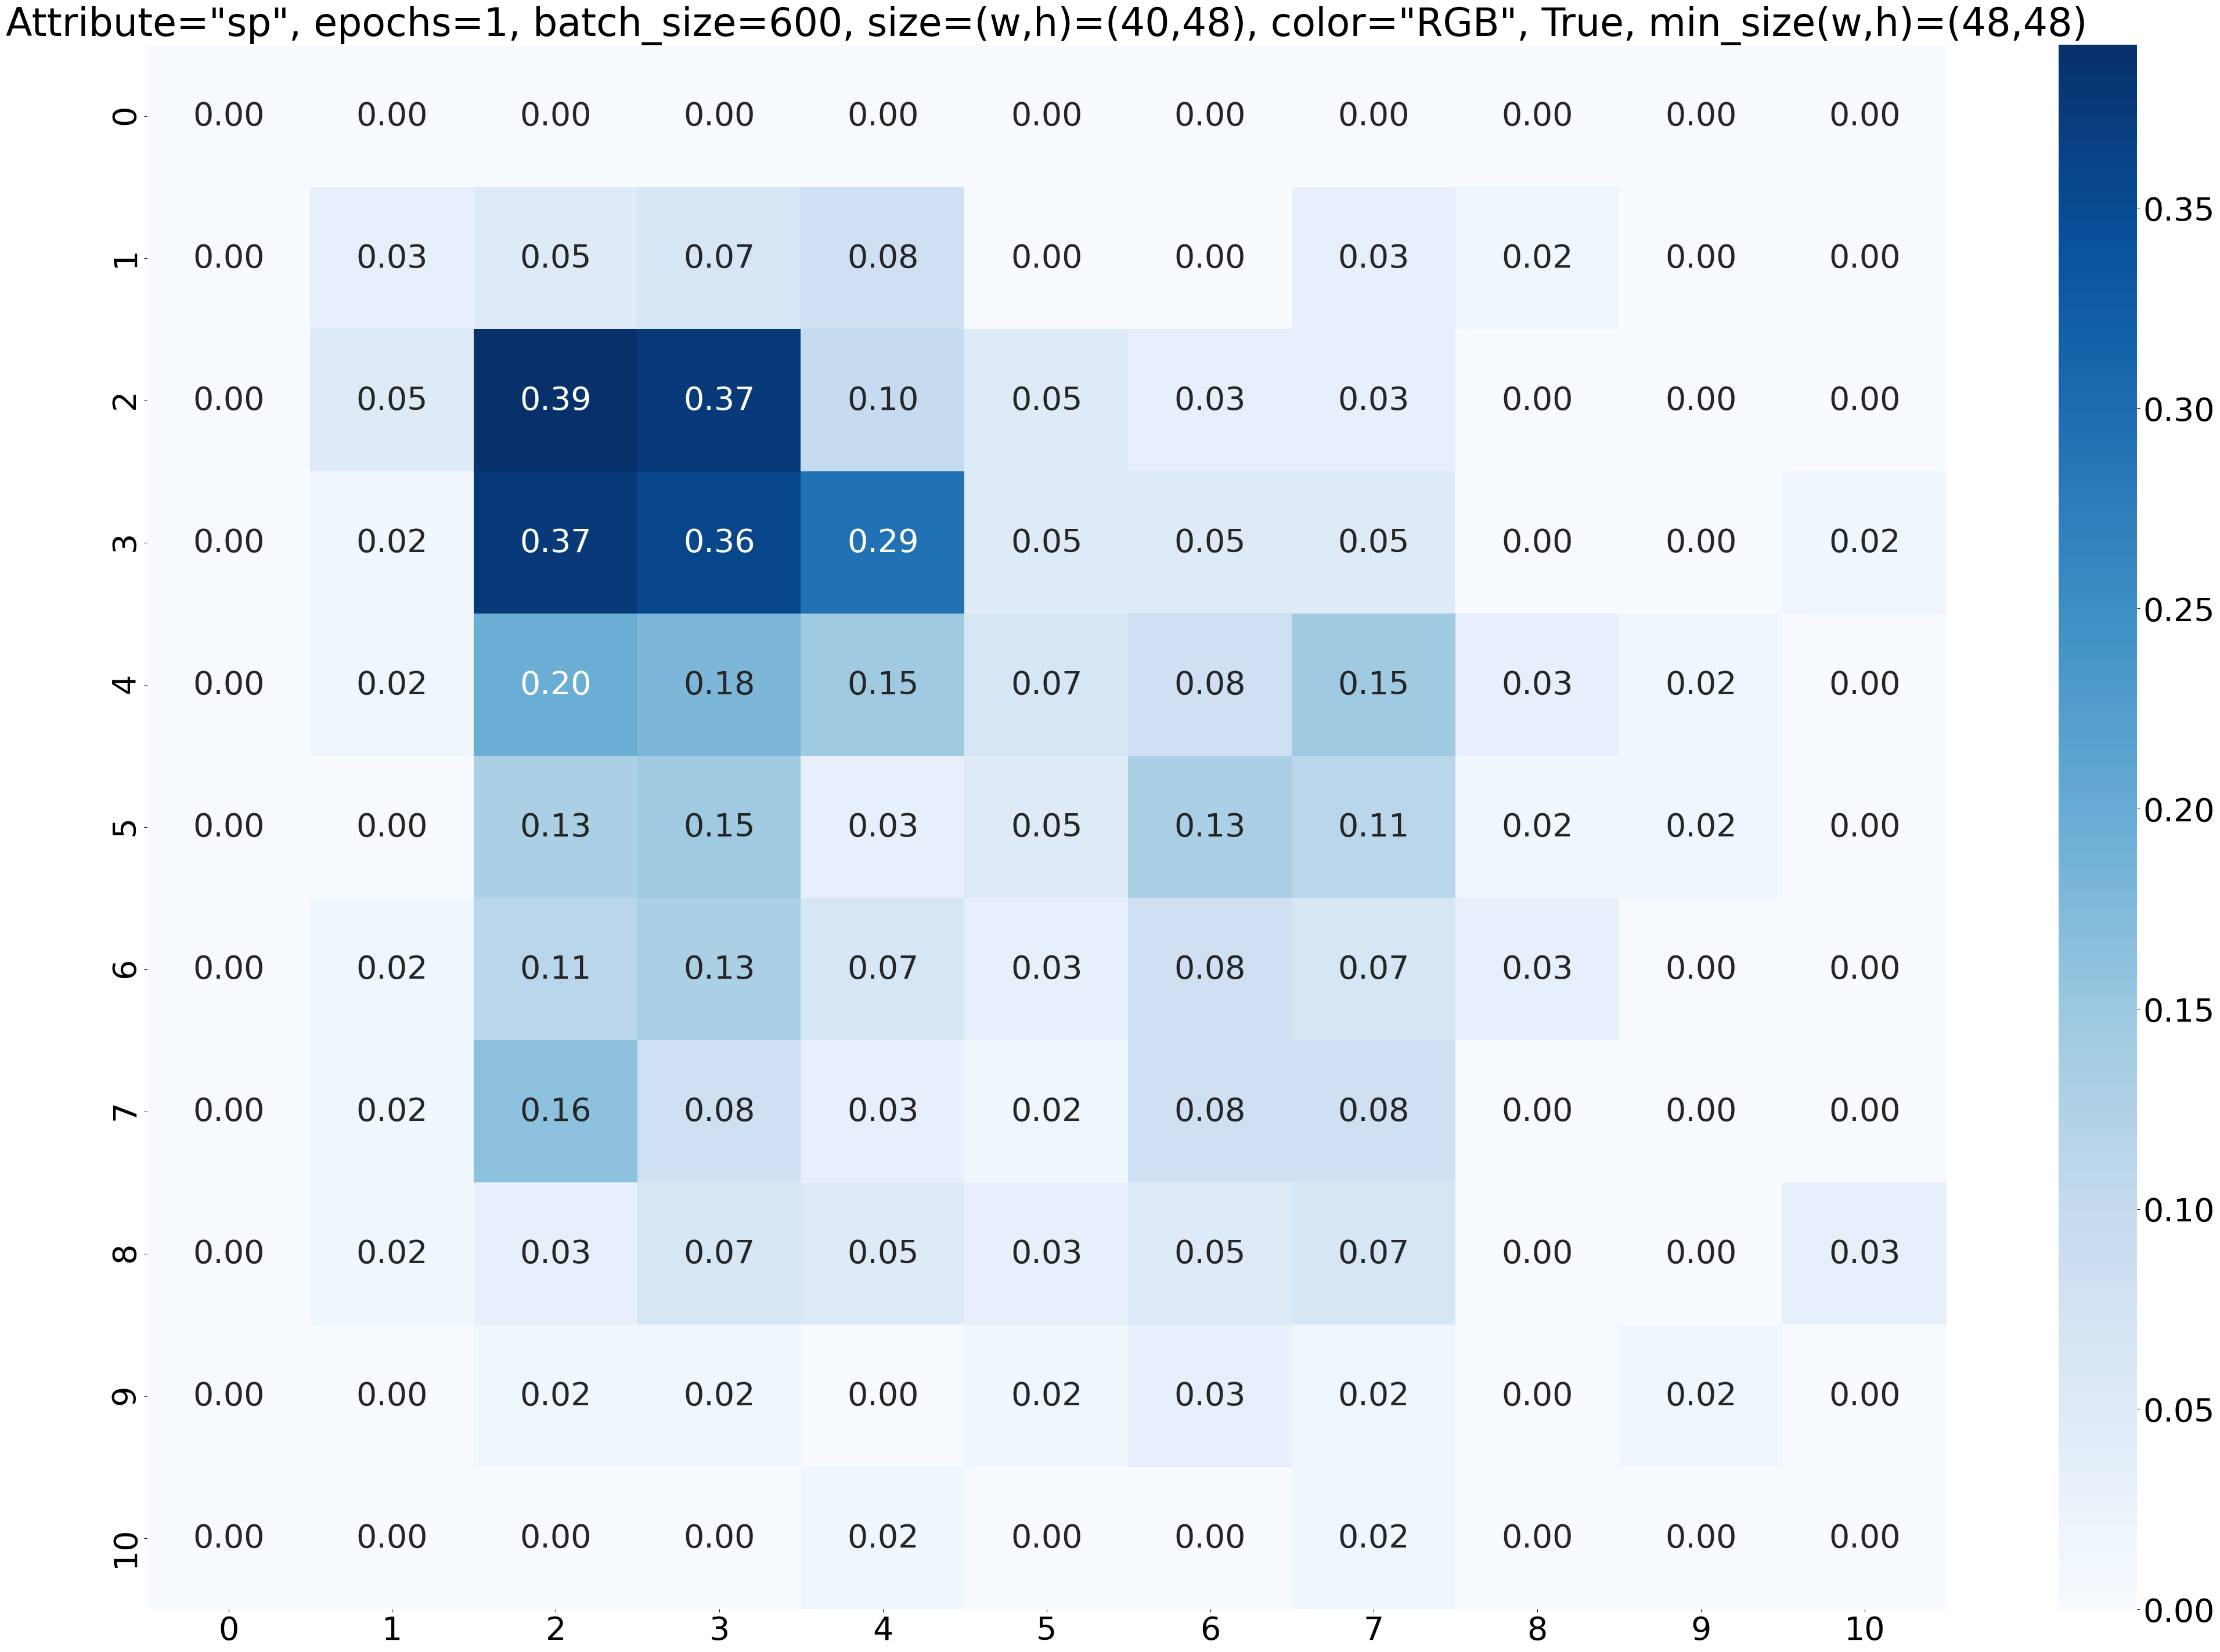

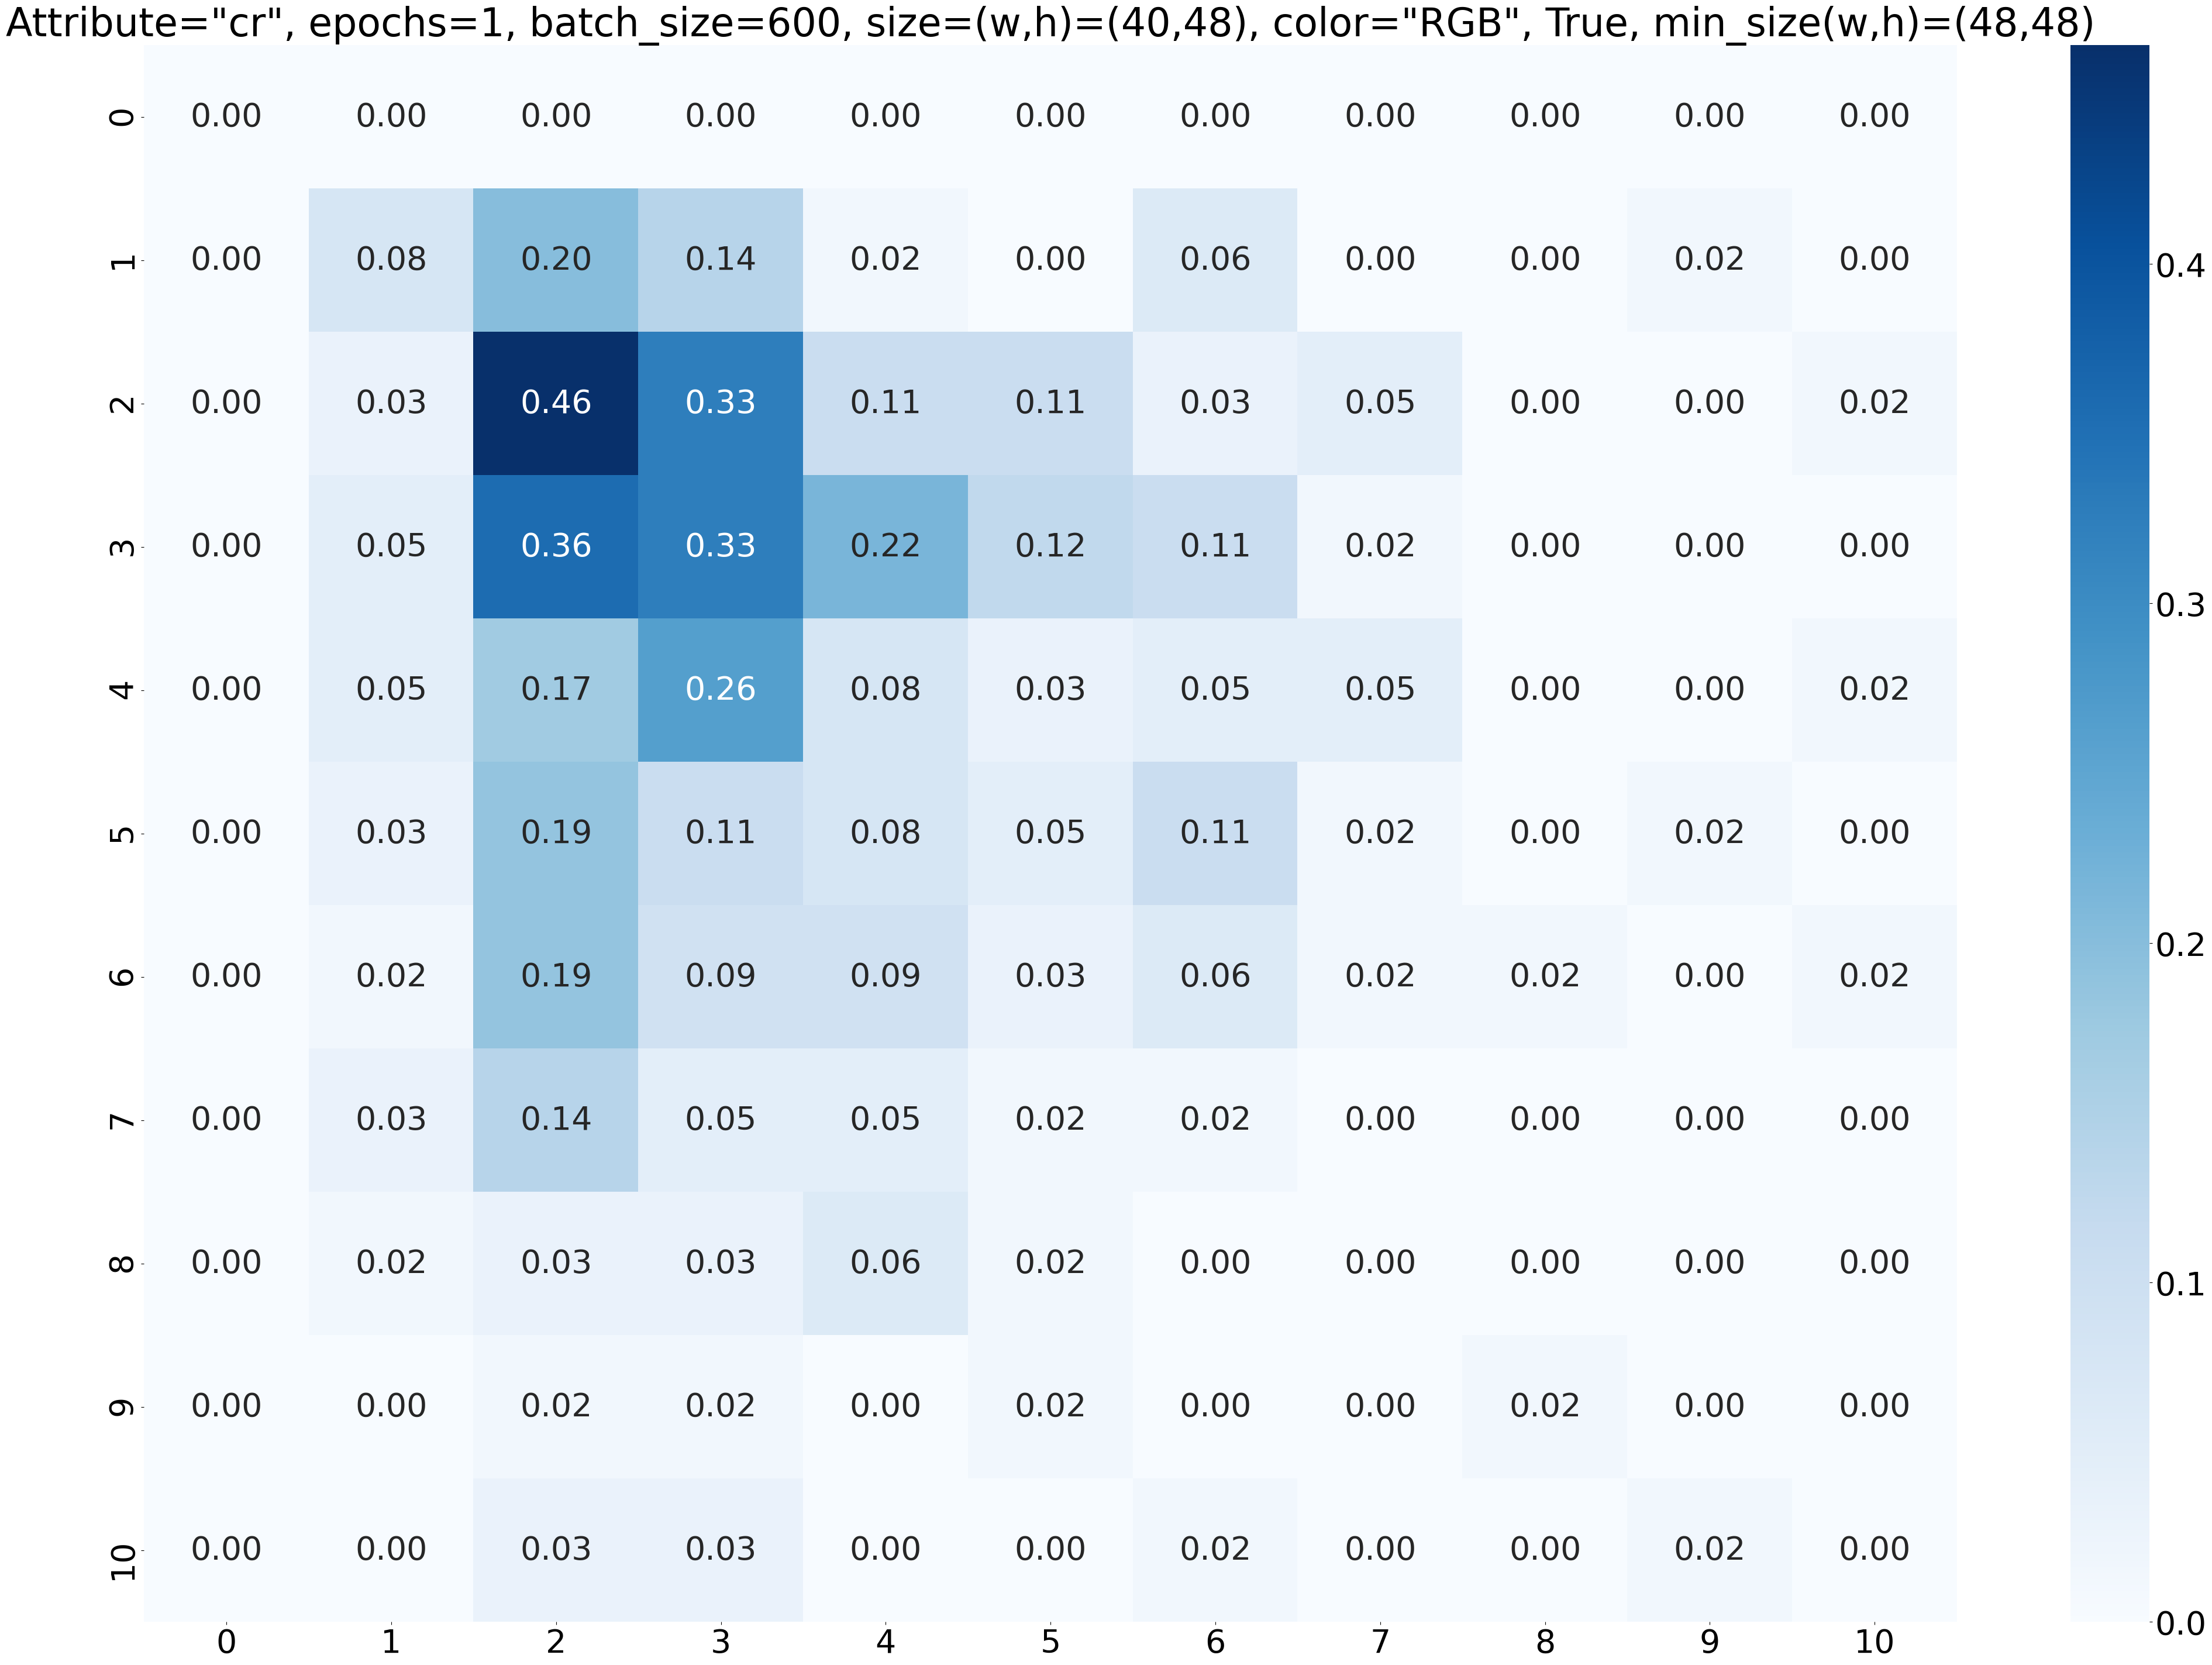

In [3]:
######################################################

# To use the following tutorial,
# please set the "attributes" array in configure yaml file contains string "hp"

# Make an new model
#
# Uncomment example:
init_model = MyRandomForestClf()

# Call this function, you'll get a dict of:
#     key -> value: str(attribute) -> MyModel
#
# Uncomment example:
attr_models = read_config_and_train(model=init_model, img_dir='data/images')

# How to save model?
#     MyModel.save_model(filename)
#
# Note:
#     Not sure whether using this function to save model that is not from sklearn is appropriate.
#
# Uncomment the example:
# attr_models['hp'].save_model('filename_you_want')

Save models

In [9]:
save_file_prefix = 'models/allRater_edges_40_48_'
for attr in attr_models:
    attr_models[attr].save_model(save_file_prefix + attr)

Load models

In [ ]:
attrs = ['hp', 'pa', 'ma', 'sp', 'cr']
attr_models = {}
for attr in attrs:
    attr_models[attr] = MyModel(config_path='config.yaml',
                                model=None,
                                model_path_to_load=save_file_prefix+attr)

Predict a file

In [ ]:
filename = 'data/images/nba_players_4.png'

def plt_img(filename):
    plt.imshow(cv2.cvtColor(cv2.imread(filename, flags=cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB))

plt_img(filename=filename)

In [ ]:
# filename = 'data/images/nba_players_4.png'
cur = 1
print("Filename: {}".format(filename))
for attr in attrs:
        pred = attr_models[attr].predict_one_image(
            filename=filename,
            show_original_img=True if cur == 1 else False,
            show_preprocessed_img=True if cur == 1 else False
        )
        print("Predicted: {} in attribute {}.".format(pred, attr))
        cur += 1